## Problem Statement
###### To predict the scaled sound pressure levels of airfoil self-noise
Find out what contributes to loud noise i.e. 120db (as noise above 120db can cause immediate harm to ears)
- To further explore if there's a way to avoid getting the levels above 120 db
    - Potentially improve on technology to make it happen
- Or to protect ears when it is predicted to be loud

##### **Airfoil Self Noise Dataset**
https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#converted downloaded file from site .dat to .csv on local computer
#dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat

df = pd.read_csv("airfoil_self_noise.csv", sep="\t", header=None, names=['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free-Stream_Velocity', 'Suction_Side_Displacement_Thickness', 'Scaled_Sound_Pressure_Level'])


### **1. EDA**
###### **Columns**
**Input (Features)** 

1. Frequency (Hz)
2. Angle of attack (°)
3. Chord length (m) 
4. Free-stream velocity (m/s).
5. Suction side displacement thickness (m). 

**Output (Variable)** 

6. Scaled sound pressure level (db)

In [3]:
#first 2 rows
df.head(2)

,Frequency,Angle_of_Attack,Chord_Length,Free-Stream_Velocity,Suction_Side_Displacement_Thickness,Scaled_Sound_Pressure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [4]:
df.isna().sum()

Frequency                              0
Angle_of_Attack                        0
Chord_Length                           0
Free-Stream_Velocity                   0
Suction_Side_Displacement_Thickness    0
Scaled_Sound_Pressure_Level            0
dtype: int64

In [5]:
df.describe()

,Frequency,Angle_of_Attack,Chord_Length,Free-Stream_Velocity,Suction_Side_Displacement_Thickness,Scaled_Sound_Pressure_Level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


##### **Loudness of Airfoil Self-Noise**

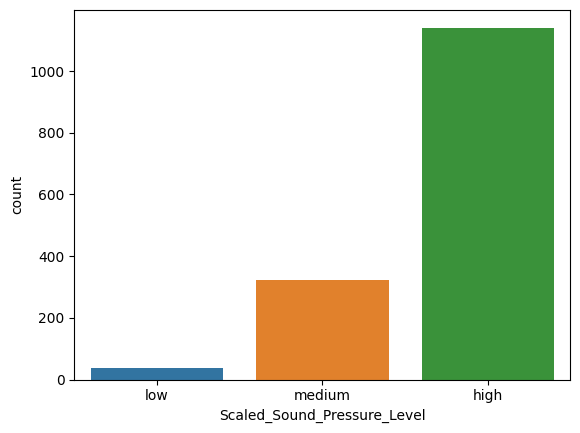

In [6]:
#find class imbalance
#120db noise level considered defeaning
noise_category = pd.cut(df['Scaled_Sound_Pressure_Level'], bins=[100,110,120,140], labels=['low', 'medium', 'high'])
sns.countplot(x=noise_category, data=df)
plt.show()

###### **High levels of sound pressure**
Based on the current data set, the scaled sound pressure level are mostly above 120db which is very loud.

##### **Relationship between Features and Variables**

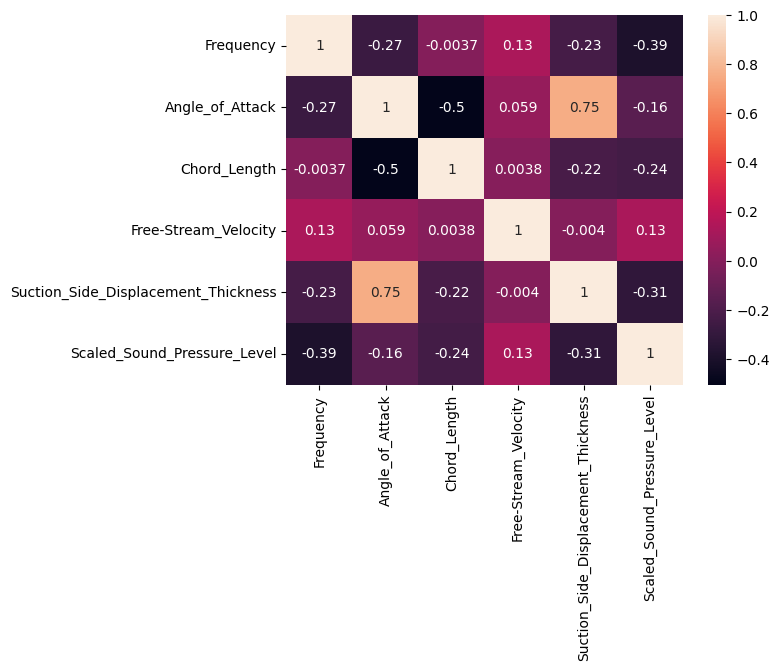

In [7]:
#correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

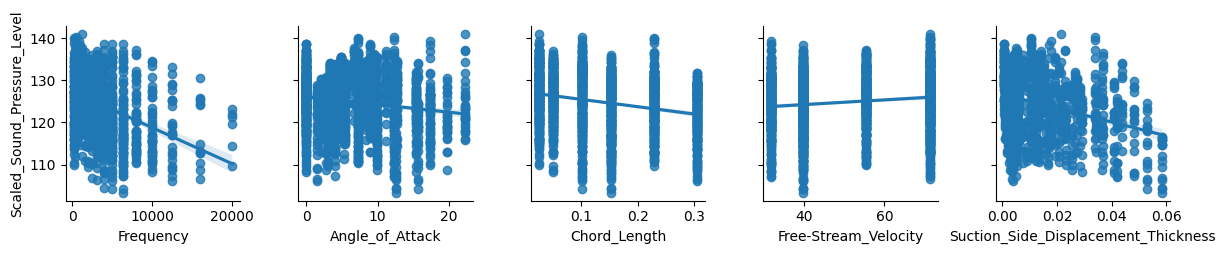

In [8]:
#visualise correlation
sns.pairplot(df, x_vars=['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free-Stream_Velocity', 'Suction_Side_Displacement_Thickness'], y_vars=['Scaled_Sound_Pressure_Level'], kind='reg')
plt.show()

In [9]:
#p-value

###### **Correlation of variables to scaled sound pressure level**
**Positive**
- Free-Stream Velocity 0.13   

**Negative**
- Frequency -0.39
- Angle of Attack -0.16
- Chord Length -0.24
- Suck Side Displacement Thickness -0.31

Will have to look at the p-values to determine which have points closer to the regression line, however, as I can't figure out how to do it with python, this will not be included.

#### **Distribution of features and variables**

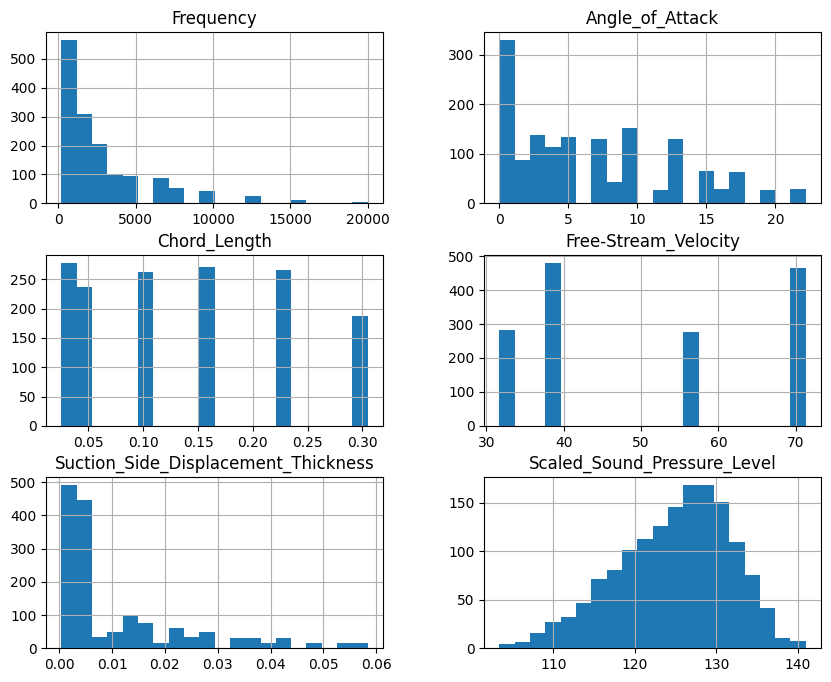

In [10]:
df.hist(bins=20, figsize=(10, 8))
plt.show()

In [11]:
#normalise distribution? - not sure if there's a need to log them, and unsure how to log using python

#### **Check for Outliers for Target Variable and Remove, if any**

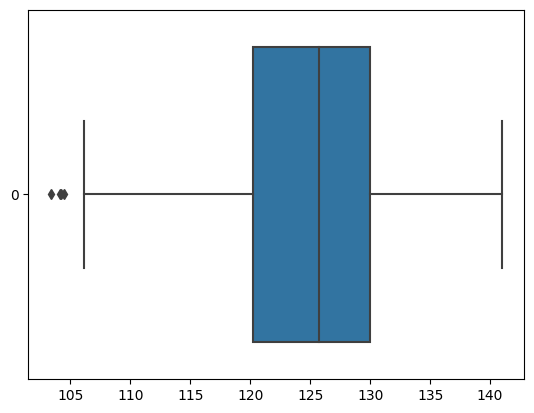

In [12]:
sns.boxplot(df['Scaled_Sound_Pressure_Level'], orient="h")
plt.show()

In [13]:
#remove outliers - unsure how to drop the outliers, only the ones below 25%

### **2. Machine Learning**
Since the dataset is small, 20% will be used for the test set.

In [14]:
#variables - ['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free-Stream_Velocity', 'Suction_Side_Displacement_Thickness']

y = df['Scaled_Sound_Pressure_Level']
df.drop(['Scaled_Sound_Pressure_Level', 'Angle_of_Attack'], axis=1, inplace=True)
X = df

In [15]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}')
print(f'R-squared: {r2}')

Mean squared error: 24.76695074947673
R-squared: 0.5056356537696436


### **3. Performance Evaluation**

###### The mean squared error and R-squared values are the evaluation metrics for the model. A lower mean squared error and a higher R-squared value indicate a better-performing model.

###### In this case, the mean squared error is 24.77 and the R-squared value is 0.51.

These values are the best fit I can get via trial and error, replacing the features to get the lowest mse with the highest R-squared value, putting more weight on the R-square value. Possible ways to improve the model would b to use other algorithms.

###### I have also tested between 20% test data and 90% test data and 20% performed better (when free stream velocity with a positive correlation is included in the features), hence, chose this split.